In [5]:
#Missing values imputations

In [6]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [7]:
data = pd.read_csv('C:/Users/Tanvi Gajula/Downloads/archive (9).zip')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [11]:
#Finding missing values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
data.isnull().sum().to_frame().T

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,0,0,0,0,0,0,0,201,0,0


In [13]:
print(data['bmi'].corr(data['id']))
 
# correlation between column 2 and column3
print(data['bmi'].corr(data['age']))
 
# correlation between column 1 and column3
print(data['bmi'].corr(data['avg_glucose_level']))

print(data['bmi'].corr(data['hypertension']))
 
# correlation between column 2 and column3
print(data['bmi'].corr(data['heart_disease']))
 

0.0030840002635501317
0.33339799516043944
0.17550217613626073
0.167810584438479
0.04135744287272007


In [14]:
#dropping the rows and columns
data_drop = data.dropna()

In [15]:
data_drop.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [16]:
#method2: Imputation - filling missing values with mean or median of the resspective column

bmi_mean = round(data['bmi'].mean(), 1)

bmi_med = data['bmi'].median()
bmi_mod = data['bmi'].mode()
print(bmi_mean)
print(bmi_med)
print(bmi_mod)

28.9
28.1
0    28.7
Name: bmi, dtype: float64


In [17]:
#Filling missing values with bmi_mean and storing new dataframe in df_imp
data_imp = data.fillna(bmi_mean, axis=1)
data_imp

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.9,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.2,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [18]:
#Filling missing values with bmi_median and storing new dataframe in df_imp
data_imp1 = data.fillna(bmi_med, axis=1)
data_imp1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.2,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [19]:
#Filling missing values with bmi_mean and storing new dataframe in df_imp
bmi_mod=28.7
data_imp2 = data.fillna(bmi_mod, axis=1)
data_imp2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.7,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.2,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [20]:
#validating imputation action
data_imp.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [21]:
numerical_vars = data.select_dtypes(np.number).drop(columns=["stroke"])
print(numerical_vars)

categorical_vars = data.select_dtypes("object")

         id   age  hypertension  heart_disease  avg_glucose_level   bmi
0      9046  67.0             0              1             228.69  36.6
1     51676  61.0             0              0             202.21   NaN
2     31112  80.0             0              1             105.92  32.5
3     60182  49.0             0              0             171.23  34.4
4      1665  79.0             1              0             174.12  24.0
...     ...   ...           ...            ...                ...   ...
5105  18234  80.0             1              0              83.75   NaN
5106  44873  81.0             0              0             125.20  40.0
5107  19723  35.0             0              0              82.99  30.6
5108  37544  51.0             0              0             166.29  25.6
5109  44679  44.0             0              0              85.28  26.2

[5110 rows x 6 columns]


In [22]:
numerical_vars.isnull().sum()

id                     0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
dtype: int64

In [23]:
categorical_vars.isnull().sum()

gender            0
ever_married      0
work_type         0
Residence_type    0
smoking_status    0
dtype: int64

In [24]:
#KNN based imputation
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(numerical_vars)
data_imputed = pd.DataFrame(imputed, columns=numerical_vars.columns)
data_imputed

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,9046.0,67.0,0.0,1.0,228.69,36.600000
1,51676.0,61.0,0.0,0.0,202.21,29.766667
2,31112.0,80.0,0.0,1.0,105.92,32.500000
3,60182.0,49.0,0.0,0.0,171.23,34.400000
4,1665.0,79.0,1.0,0.0,174.12,24.000000
...,...,...,...,...,...,...
5105,18234.0,80.0,1.0,0.0,83.75,31.433333
5106,44873.0,81.0,0.0,0.0,125.20,40.000000
5107,19723.0,35.0,0.0,0.0,82.99,30.600000
5108,37544.0,51.0,0.0,0.0,166.29,25.600000


In [25]:
#separating null values
dataTest_null=data[data["bmi"].isnull()]
dataTest_null

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [26]:
#drop the null values from data and consider as train data
data.dropna(inplace=True)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [27]:
#checking null values in data set
numerical_vars.isnull().sum()

id                     0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
dtype: int64

In [42]:
X_train

,id,age,hypertension,heart_disease,avg_glucose_level
0,9046,67.0,0,1,228.69
2,31112,80.0,0,1,105.92
3,60182,49.0,0,0,171.23
4,1665,79.0,1,0,174.12
5,56669,81.0,0,0,186.21
...,...,...,...,...,...
5104,14180,13.0,0,0,103.08
5106,44873,81.0,0,0,125.20
5107,19723,35.0,0,0,82.99
5108,37544,51.0,0,0,166.29


In [39]:
#remove rows with any values that are not finite
data_new = numerical_vars[np.isfinite(numerical_vars).all(1)]

#view updated DataFrame
print(data_new)


         id   age  hypertension  heart_disease  avg_glucose_level   bmi
0      9046  67.0             0              1             228.69  36.6
2     31112  80.0             0              1             105.92  32.5
3     60182  49.0             0              0             171.23  34.4
4      1665  79.0             1              0             174.12  24.0
5     56669  81.0             0              0             186.21  29.0
...     ...   ...           ...            ...                ...   ...
5104  14180  13.0             0              0             103.08  18.6
5106  44873  81.0             0              0             125.20  40.0
5107  19723  35.0             0              0              82.99  30.6
5108  37544  51.0             0              0             166.29  25.6
5109  44679  44.0             0              0              85.28  26.2

[4909 rows x 6 columns]


In [41]:
#Create X_train and Y_train from data
y_train = data_new["bmi"]
X_train = data_new.drop("bmi",axis=1)
y_train

0       36.6
2       32.5
3       34.4
4       24.0
5       29.0
        ... 
5104    18.6
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 4909, dtype: float64

In [43]:
#Building linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [44]:
lr.fit(X_train, y_train)
lr

LinearRegression()

In [45]:
X_test= data_new.drop("bmi",axis=1)
X_test

,id,age,hypertension,heart_disease,avg_glucose_level
0,9046,67.0,0,1,228.69
2,31112,80.0,0,1,105.92
3,60182,49.0,0,0,171.23
4,1665,79.0,1,0,174.12
5,56669,81.0,0,0,186.21
...,...,...,...,...,...
5104,14180,13.0,0,0,103.08
5106,44873,81.0,0,0,125.20
5107,19723,35.0,0,0,82.99
5108,37544,51.0,0,0,166.29


In [46]:
#applying the model on X_test and predicting missing values
y_pred = lr.predict(X_test)
y_pred

array([31.35275623, 30.5708804 , 30.63371711, ..., 27.59097873,
       30.76061306, 28.58761922])

In [47]:
#replacing the values
data_new.loc[data_new.bmi.isnull(),'bmi']=y_pred

In [48]:
data_new

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,9046,67.0,0,1,228.69,36.6
2,31112,80.0,0,1,105.92,32.5
3,60182,49.0,0,0,171.23,34.4
4,1665,79.0,1,0,174.12,24.0
5,56669,81.0,0,0,186.21,29.0
...,...,...,...,...,...,...
5104,14180,13.0,0,0,103.08,18.6
5106,44873,81.0,0,0,125.20,40.0
5107,19723,35.0,0,0,82.99,30.6
5108,37544,51.0,0,0,166.29,25.6


In [49]:
#Clusturing

In [61]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [76]:
x=data_new.copy()

In [77]:
kmeans=KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [78]:
cluster=x.copy()
cluster['cluster_pred']=kmeans.fit_predict(x)

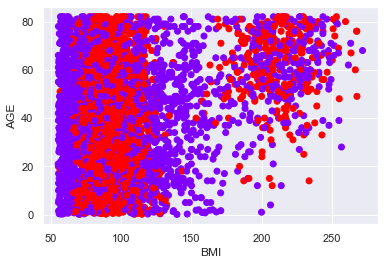

In [79]:
plt.scatter(cluster["avg_glucose_level"],cluster["age"],c=cluster['cluster_pred'],cmap='rainbow')
plt.xlabel('BMI')
plt.ylabel('AGE')
plt.show()

In [81]:
cluster=x.copy()
cluster['cluster_pred']=kmeans.fit_predict(x)

[0 0 1 ... 0 1 1]


In [72]:
#density based clusturing
X1 = data.loc[:, ['age','avg_glucose_level']].values
X1

array([[ 67.  , 228.69],
       [ 80.  , 105.92],
       [ 49.  , 171.23],
       ...,
       [ 35.  ,  82.99],
       [ 51.  , 166.29],
       [ 44.  ,  85.28]])

In [82]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(X1) # fitting the model
labels = dbscan.labels_ # getting the labels

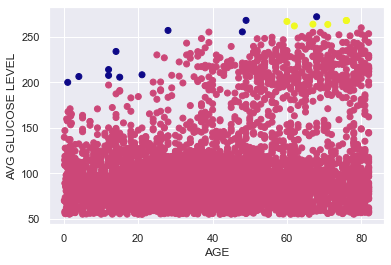

In [74]:
# Plot the clusters
plt.scatter(X1[:, 0], X1[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("AGE") # X-axis label
plt.ylabel("AVG GLUCOSE LEVEL") # Y-axis label
plt.show() # showing the plot

In [100]:
#Local Outlier factor
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Extract the columns you want to analyze for outliers
X2 = data[['age','avg_glucose_level']]

# Set the LOF parameters
n_neighbors = 20  # number of neighbors to consider for LOF calculation
contamination = 0.1  # percentage of outliers expected in the dataset

# Initialize LOF model with default settings
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Fit the model and predict outliers
y_pred = lof.fit_predict(X2)

# Add the predicted outlier labels to the original DataFrame
data['outlier'] = y_pred

# Print the indices of the detected outliers
outliers = data[data['outlier'] == -1].index
print('Detected outliers:', outliers)

Detected outliers: Int64Index([   4,    5,   11,   12,   23,   26,   32,   33,   42,   71,
            ...
            5019, 5034, 5059, 5061, 5063, 5071, 5076, 5080, 5092, 5100],
           dtype='int64', length=491)


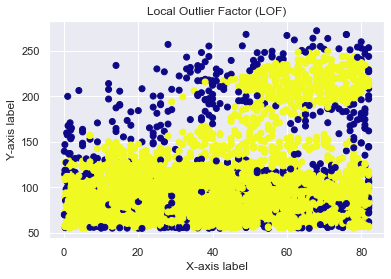

In [101]:
# Fit the LOF model
clf = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
y_pred = clf.fit_predict(X2)

# Plot the results
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y_pred, cmap='plasma')
plt.title('Local Outlier Factor (LOF)')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.show()

In [115]:
import pandas as pd
X = data.drop("stroke", 1)       # feature matrix
y = data['stroke']               # target feature

In [113]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [114]:
forward_selection(x,y)

['age', 'avg_glucose_level', 'heart_disease', 'hypertension', 'bmi']

In [120]:
# Converting binary Nominal Variable Gender to numeric
data['gender'].replace({'M':1, 'F':0}, inplace=True)
print(data)
 
# Converting multiclass Nominal Variable Department to numeric
# by generating dummy variables
data=pd.get_dummies(data)
print(data)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
5     56669    Male  81.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5104  14180  Female  13.0             0              0           No   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  67.0  former

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [121]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
data_scaled = pd.DataFrame(scalar.fit_transform(data), columns=data.columns)
data_scaled

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,outlier,gender_Female,gender_Male,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,-1.334653,1.070138,-0.318067,4.381968,2.777698,1.070138,4.742155,0.333371,-1.199942,1.200447,...,-0.067095,0.863918,-0.432978,-0.397906,-0.985640,0.985640,-0.657926,2.205673,-0.778346,-0.420302
1,-0.283539,1.646563,-0.318067,4.381968,0.013842,1.646563,4.742155,0.333371,-1.199942,1.200447,...,-0.067095,0.863918,-0.432978,-0.397906,1.014569,-1.014569,-0.657926,-0.453376,1.284775,-0.420302
2,1.101211,0.272012,-0.318067,-0.228208,1.484132,0.272012,4.742155,0.333371,0.833374,-0.833023,...,-0.067095,0.863918,-0.432978,-0.397906,-0.985640,0.985640,-0.657926,-0.453376,-0.778346,2.379241
3,-1.686247,1.602222,3.143994,-0.228208,1.549193,1.602222,4.742155,-2.999661,0.833374,-0.833023,...,-0.067095,-1.157518,2.309587,-0.397906,1.014569,-1.014569,-0.657926,-0.453376,1.284775,-0.420302
4,0.933870,1.690903,-0.318067,-0.228208,1.821368,1.690903,4.742155,-2.999661,-1.199942,1.200447,...,-0.067095,0.863918,-0.432978,-0.397906,-0.985640,0.985640,-0.657926,2.205673,-0.778346,-0.420302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,-1.090095,-1.324241,-0.318067,-0.228208,-0.050094,-1.324241,-0.210875,0.333371,0.833374,-0.833023,...,-0.067095,-1.157518,-0.432978,2.513155,1.014569,-1.014569,1.519928,-0.453376,-0.778346,-0.420302
4905,0.371967,1.690903,-0.318067,-0.228208,0.447882,1.690903,-0.210875,0.333371,0.833374,-0.833023,...,-0.067095,-1.157518,2.309587,-0.397906,-0.985640,0.985640,-0.657926,-0.453376,1.284775,-0.420302
4906,-0.826054,-0.348753,-0.318067,-0.228208,-0.502369,-0.348753,-0.210875,0.333371,0.833374,-0.833023,...,-0.067095,-1.157518,2.309587,-0.397906,1.014569,-1.014569,-0.657926,-0.453376,1.284775,-0.420302
4907,0.022850,0.360692,-0.318067,-0.228208,1.372920,0.360692,-0.210875,0.333371,-1.199942,1.200447,...,-0.067095,0.863918,-0.432978,-0.397906,1.014569,-1.014569,-0.657926,2.205673,-0.778346,-0.420302


In [122]:
pca = PCA()
dataa_pca = pd.DataFrame(pca.fit_transform(data_scaled))
dataa_pca

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-3.233518,3.298436,-1.113964,-0.307190,-1.074233,3.549542,0.767469,0.996858,0.924647,-3.885352,...,2.232603,-1.236717,-1.311458,0.753412,-1.173243e-15,-3.599786e-17,-3.497054e-16,3.758003e-16,9.404938e-17,1.073994e-16
1,-3.216000,2.070615,1.732402,-0.772944,0.940206,2.300121,0.227676,-0.783696,0.206431,-3.727086,...,2.542687,0.724627,-0.957713,-0.101806,1.435840e-14,1.438858e-15,-1.440663e-15,8.357590e-16,-5.192401e-16,1.093797e-15
2,-1.864591,-0.589943,-1.493630,-0.620971,-1.598813,2.253386,-2.062213,-0.635441,0.596979,-0.918248,...,3.203690,-1.733132,-0.847718,0.326307,-2.505517e-15,-2.830222e-16,7.889303e-17,5.504682e-16,-3.976555e-16,2.221847e-16
3,-3.731736,0.098630,1.448204,3.314329,1.807852,4.170727,-0.381198,-1.047239,-0.187630,-1.041568,...,2.173670,1.175734,-0.431569,0.435927,-1.009958e-15,-1.251820e-15,7.758245e-16,-4.016991e-16,-5.464907e-17,4.609235e-17
4,-3.199623,2.691097,-1.079664,-0.353671,-0.789509,3.497106,-0.065894,2.389944,-0.120303,0.200618,...,3.893443,0.379689,-0.074362,-0.421437,-6.540594e-17,3.479462e-16,-1.285286e-16,-8.626661e-16,-2.149011e-16,4.062951e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,3.946814,-0.706164,1.230791,1.693809,-0.663190,0.373336,0.155459,-0.265165,-0.383992,-0.895588,...,-0.204680,-0.375567,-0.451362,-0.788437,1.699655e-16,-6.305941e-17,-3.231834e-17,-2.468344e-17,-3.883728e-17,4.169851e-17
4905,-2.575816,-0.866279,-1.527435,1.793997,1.309784,-0.222897,1.000295,-1.242218,-0.237798,1.116130,...,0.292804,-0.636968,0.524233,-0.769763,-1.175211e-16,-1.814749e-16,-1.563939e-17,-2.337976e-17,3.325856e-18,1.016686e-17
4906,-0.694517,-1.362796,1.267203,1.664092,1.216622,-0.964277,1.022375,-1.591841,0.052845,0.574188,...,0.457173,-0.120849,-0.888896,0.908316,1.231115e-16,2.441352e-17,-1.776911e-16,2.002338e-16,-5.849535e-17,-4.571342e-17
4907,-1.355768,1.727206,1.612965,-1.080467,-1.081858,-0.106973,1.084825,1.466533,0.294023,0.358613,...,-0.018265,-1.214165,-0.294494,-0.015811,8.995130e-17,1.856609e-16,8.365727e-17,-1.015880e-16,3.255296e-17,-3.461676e-18


In [129]:
pca = PCA(n_components=0.80, whiten=True)

X_pca = pca.fit_transform(dataa_pca)
print(X_pca)

print("Original number of features:", dataa_pca.shape[1])
print("Reduced number of features:", X_pca.shape[1])

[[-1.50091437  2.27243759 -0.78569802 ... -0.03307693  0.57236816
   0.2624343 ]
 [-1.49278321  1.42653782  1.22189371 ...  0.28945405  2.68197449
   0.27350681]
 [-0.86549425 -0.40643746 -1.05348363 ... -0.05074244  1.63295641
  -0.02404549]
 ...
 [-0.32237684 -0.93888968  0.89378082 ...  0.32851483 -0.64276294
  -0.12561198]
 [-0.62931215  1.18994821  1.13765239 ... -0.47867258 -0.81336345
  -0.17779296]
 [-0.04020967 -0.46954964 -1.16868944 ... -0.01758752  0.88470241
   0.93708233]]
Original number of features: 24
Reduced number of features: 13
[-1.49278321  1.42653782  1.22189371 -0.58883847  0.78849723  1.98035635
  0.20653102 -0.73562394  0.19950036 -3.66436558  0.28945405  2.68197449
  0.27350681]
